In [1]:
# Note: This is a hack to allow importing from the parent directory
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))

In [2]:
from utils import collect_class_images, load_cifar10

"""
1. Grid search space
2. Prepare code for notebook to run the experiment
"""

'\n1. Grid search space\n2. Prepare code for notebook to run the experiment\n'

In [3]:
# Load CIFAR-10 training data
dataloader = load_cifar10(batch_size=32, shuffle=False, train=True, data_root="../data")

# Collect 10 images for each class
N = 1
class_images = collect_class_images(dataloader, N)

class_images

Files already downloaded and verified


{'airplane': [tensor([[[0.7922, 0.8000, 0.7804],
           [0.7922, 0.8000, 0.7804],
           [0.8000, 0.8078, 0.7882],
           ...,
           [0.8118, 0.8157, 0.7843],
           [0.8039, 0.8078, 0.7804],
           [0.7961, 0.8000, 0.7765]],
  
          [[0.8078, 0.8157, 0.7961],
           [0.8078, 0.8157, 0.7961],
           [0.8118, 0.8196, 0.8000],
           ...,
           [0.8235, 0.8275, 0.8039],
           [0.8157, 0.8196, 0.7961],
           [0.8078, 0.8118, 0.7882]],
  
          [[0.8235, 0.8314, 0.8118],
           [0.8275, 0.8353, 0.8157],
           [0.8314, 0.8392, 0.8235],
           ...,
           [0.8392, 0.8392, 0.8235],
           [0.8314, 0.8353, 0.8157],
           [0.8235, 0.8275, 0.8078]],
  
          ...,
  
          [[0.8549, 0.8510, 0.8706],
           [0.8235, 0.8196, 0.8392],
           [0.7608, 0.7608, 0.7765],
           ...,
           [0.9529, 0.9490, 0.9686],
           [0.9569, 0.9490, 0.9686],
           [0.9529, 0.9529, 0.9686]],
  
  

{'max_steps': 500, 'num_points': 256, 'init_type': 'random'}
Training Gaussian model for class airplane
Model initialized. Number of Gaussians: 256


/usr/local/lib/python3.10/dist-packages/torchmetrics/functional/image/lpips.py:323: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path,

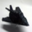

JPG image saved to: results/original.jpg


  0%|          | 0/500 [00:00<?, ?it/s]


AssertionError: torch.Size([4, 4])

In [4]:
from models import GaussianImageTrainer
from utils import generate_grid_search_combinations
from constants import GRID_SEARCH_SPACE_TEST_0
from configs import Config

for hyperparameters in generate_grid_search_combinations(GRID_SEARCH_SPACE_TEST_0):
    print(hyperparameters)
    for label, images in class_images.items():
        print(f"Training Gaussian model for class {label}")
        for index, image in enumerate(images):
            config = Config(**hyperparameters)
            config.image = image
            model = GaussianImageTrainer(config)
            model.train()
            # Create a new trainer object for each iteration!
            # train(
            #     height=32,
            #     width=32,
            #     num_points=1024,
            #     results_path=Path(f"label_{label}_image_{index}"),
            #     iterations=1000,
            # )
            break
        break

In [ ]:
!pip install tensorboard\

In [ ]:
# 1. import contanct for gird search
# 2. grid search
# 3. save results -> config_test_1